In [264]:

from fredapi import Fred
fred = Fred(api_key='3b030421fe8704207bca9046558e4b15')




In [265]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]


# Create Fred Object 

In [266]:
fred
#fred = Fred(api_key='3b030421fe8704207bca9046558e4b15')

In [267]:
fred.search('S&P')
sp_search = fred.search('S&P', order_by='popularity')


sp_search.head()

Pull Raw Data 

<AxesSubplot:title={'center':'S&P 500'}>

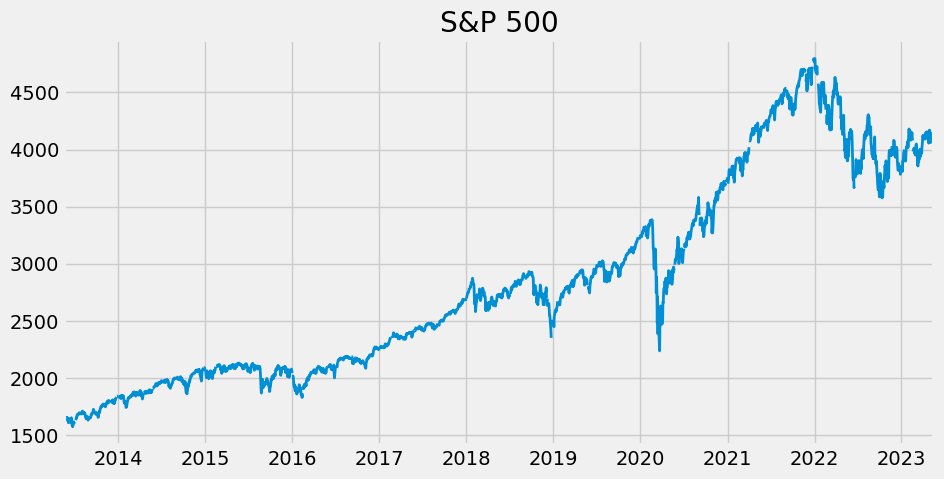

In [268]:
sp500 = fred.get_series(series_id='SP500')

sp500.plot(figsize = (10, 5) , title = 'S&P 500', lw = 2)

# Pull and Join Multiple Data Series 

In [269]:
uemp_results = fred.search('unemployment')

In [270]:
 unrate = fred.get_series('UNRATE')

<AxesSubplot:>

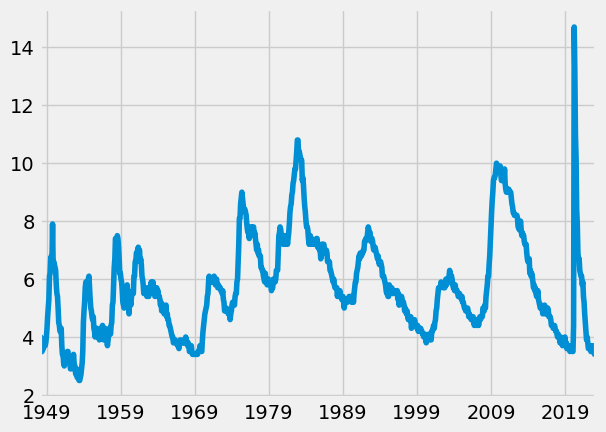

In [271]:
unrate.plot()

In [272]:
unemp_df = fred.search('unemployment state', filter = ('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [273]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-05-20   2023-05-20   
LNS14000006            LNS14000006     2023-05-20   2023-05-20   
CAUR                          CAUR     2023-05-20   2023-05-20   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-05-20   2023-05-20   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-05-20   2023-05-20   
...                            ...            ...          ...   
CNEWUR                      CNEWUR     2023-05-20   2023-05-20   
LNS14000029            LNS14000029     2023-05-20   2023-05-20   
LNS14000164            LNS14000164     2023-05-20   2023-05-20   
LRUN25FEUSM156S    LRUN25FEUSM156S     2023-05-20   2023-05-20   
LNS14000026            LNS14000026     2023-05-20   2023-05-20   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
CNEWUR             Unemployment Rate in New England Census Division   
LNS14000029         Unemployment Rate - 20 Yrs. & over, White Women   
LNS14000164                     Unemployment Rate - 25-34 Yrs., Men   
LRUN25FEUSM156S   Unemployment Rate: Aged 25-54: Females for the...   
LNS14000026               Unemployment Rate - 20 Yrs. & over, Women   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-04-01   Monthly               M   
LNS14000006             1972-01-01      2023-04-01   Monthly               M   
CAUR                    1976-01-01      2023-03-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
CNEWUR                  1976-01-01      2023-03-01   Monthly               M   
LNS14000029             1954-01-01      2023-04-01   Monthly               M   
LNS14000164             1948-01-01      2023-04-01   Monthly               M   
LRUN25FEUSM156S         1960-01-01      2023-03-01   Monthly               M   
LNS14000026             1948-01-01      2023-04-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
CNEWUR            Percent           %  Seasonally Adjusted   
LNS14000029       Percent           %  Seasonally Adjusted   
LNS14000164       Percent           %  Seasonally Adjusted   
LRUN25FEUSM156S   Percent           %  Seasonally Adjusted   
LNS14000026       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-05-05 07:44:02-05:00   
LNS14000006                             SA  2023-05-05 07:44:07-05:00   
CAUR                                    SA  2023-05-01 10:47:01-05:00   
M0892AUSM156SNBR                    

In [274]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

all_results = []

for myid in unemp_df.index:
   results = fred.get_series(myid)
   results = results.to_frame(name=myid) 
   all_results.append(results)

pd.concat(all_results, axis=1)

# Concat as in the video, but don't perform the drop yet
uemp_results = pd.concat(all_results, axis=1)

#then create a function to iterate over all column titles and add them to a list if they are over 4 char. long
cols_to_drop = []

for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)

#Then drop those cols.
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

uemp_states = uemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [275]:
px.line(uemp_states)
#plot states unemployment rate 

# Pull April Unemployment Data from each state


In [276]:
uemp_states

California   Florida   New York   Texas   Ohio   Pennsylvania  \
1976-01-01          9.2       9.7       10.3     5.8    8.1            8.0   
1976-02-01          9.2       9.7       10.3     5.8    8.1            8.1   
1976-03-01          9.1       9.6       10.2     5.9    8.1            8.1   
1976-04-01          9.1       9.5       10.2     5.9    8.0            8.1   
1976-05-01          9.0       9.3       10.1     5.9    7.8            8.1   
...                 ...       ...        ...     ...    ...            ...   
2022-11-01          4.1       2.7        4.1     3.8    4.1            4.4   
2022-12-01          4.1       2.7        4.1     3.8    4.1            4.3   
2023-01-01          4.2       2.6        4.2     3.9    4.0            4.3   
2023-02-01          4.4       2.6        4.2     4.0    3.9            4.4   
2023-03-01          4.4       2.6        4.1     4.0    3.8            4.2   

             Illinois   Massachusetts   Michigan   Wisconsin   North Carolina  \
1976-01-01        6.6            10.5        9.9         5.8              6.4   
1976-02-01        6.6            10.5        9.9         5.8              6.4   
1976-03-01        6.6            10.5        9.9         5.7              6.4   
1976-04-01        6.6            10.3        9.8         5.6              6.3   
1976-05-01        6.6            10.1        9.6         5.5              6.1   
...               ...             ...        ...         ...              ...   
2022-11-01        4.6             3.7        4.4         3.0              3.9   
2022-12-01        4.6             3.7        4.3         3.0              3.8   
2023-01-01        4.5             3.5        4.3         2.9              3.8   
2023-02-01        4.5             3.7        4.3         2.7              3.6   
2023-03-01        4.4             3.5        4.1         2.5              3.5   

             Alabama   Tennessee   Colorado   Virginia   Minnesota   Georgia  \
1976-01-01       6.6         6.0        5.8        6.1         6.0       8.4   
1976-02-01       6.6         6.0        5.7        6.1         6.0       8.4   
1976-03-01       6.6         6.0        5.7        6.1         5.9       8.4   
1976-04-01       6.5         6.0        5.6        6.0         5.8       8.3   
1976-05-01       6.4         5.9        5.6        5.9         5.7       8.1   
...              ...         ...        ...        ...         ...       ...   
2022-11-01       2.6         3.5        2.8        3.2         3.0       3.1   
2022-12-01       2.6         3.5        2.8        3.1         2.9       3.1   
2023-01-01       2.6         3.5        2.8        3.2         2.9       3.1   
2023-02-01       2.5         3.5        2.9        3.2         3.0       3.1   
2023-03-01       2.3         3.4        2.8        3.2         2.8       3.1   

             Kentucky   South Carolina   Washington   Oregon   Indiana  \
1976-01-01        5.6              7.4          8.5      9.5       6.6   
1976-02-01        5.6              7.4          8.5      9.5       6.6   
1976-03-01        5.6              7.3          8.4      9.4       6.5   
1976-04-01        5.6              7.2          8.5      9.2       6.3   
1976-05-01        5.5              7.0          8.5      9.1       6.0   
...               ...              ...          ...      ...       ...   
2022-11-01        3.9              3.3          4.6      4.8       3.2   
2022-12-01        3.9              3.3          4.5      4.8       3.1   
2023-01-01        3.9              3.2          4.6      4.8       3.1   
2023-02-01        3.9              3.2          4.6      4.7       3.1   
2023-03-01        3.8              3.2          4.5      4.4       3.1   

             New Mexico   Alaska   Missouri   Nevada   Iowa   Oklahoma  \
1976-01-01          8.6      7.1        5.9      9.2    4.3        5.8   
1976-02-01          8.7      7.1        5.9      9.2    4.3        5.8   
1976-03-01          8.7      7.

In [277]:
uemp_states.index == '2020-05-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

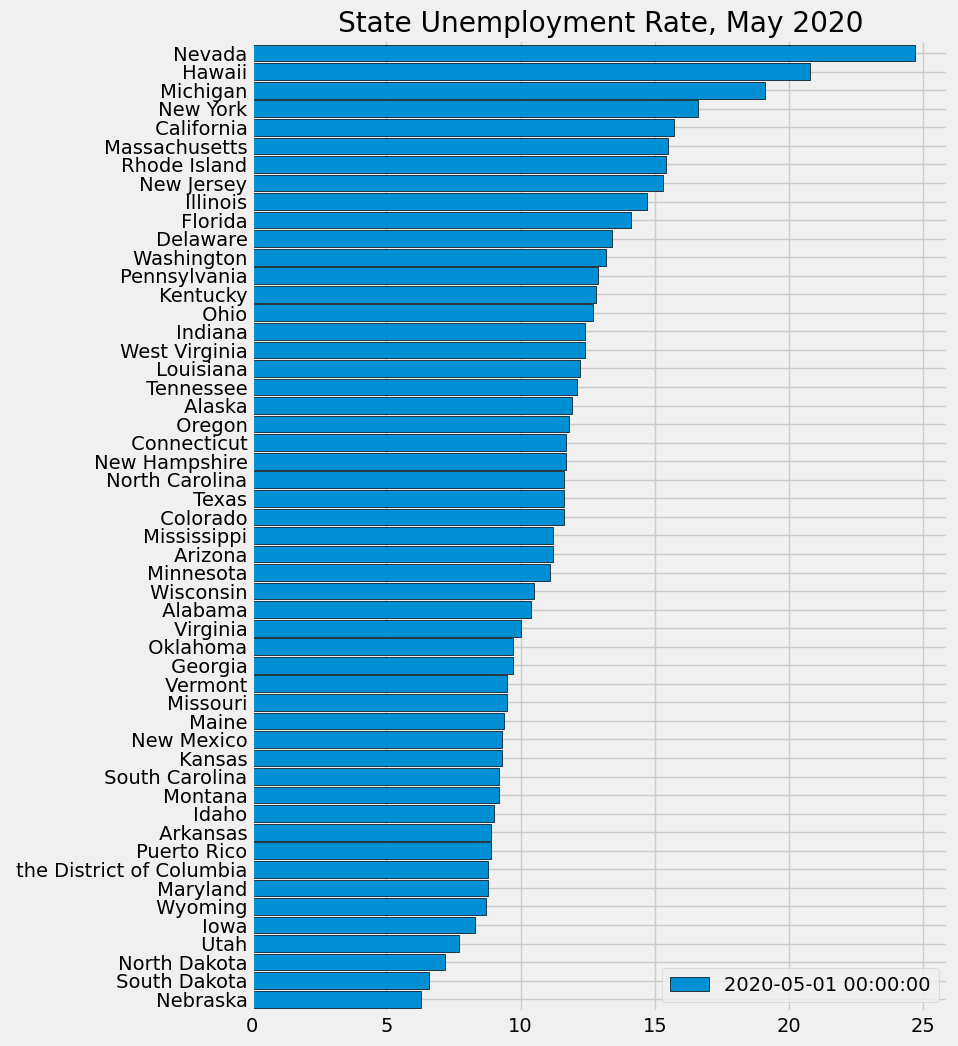

In [278]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12),width =.9,edgecolor= 'black', title= 'State Unemployment Rate, May 2020') \


             


# Pull Participation Rate 

In [279]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [280]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()


all_results = []

for myid in part_df.index:
   results = fred.get_series(myid)
   results = results.to_frame(name=myid) 
   all_results.append(results)

pd.concat(all_results, axis=1)

# Concat as in the video, but don't perform the drop yet
part_states = pd.concat(all_results, axis=1)
#then create a function to iterate over all column titles and add them to a list if they are over 4 char. long
cols_to_drop = []

for i in part_states:
    if len(i) > 29:
        cols_to_drop.append(i)

#Then drop those cols.
part_states = part_states.drop(columns = cols_to_drop, axis=1)


part_states.columns = [part_id_to_state[c] for c in part_states.columns]



ValueError: Internal Server Error

In [ ]:
part_states = part_states.sort_index(axis=1)


In [ ]:
part_states = part_states.iloc[:, :51]



In [ ]:
part_states = part_states.dropna()


In [ ]:
part_states

# Plot Unemployment vs Paricipation 

In [293]:
# Fix D.C
uemp_states = uemp_states.rename(columns={' the District of Columbia': 'District of Columbia'})

California   Florida   New York   Texas   Ohio   Pennsylvania  \
1976-01-01          9.2       9.7       10.3     5.8    8.1            8.0   
1976-02-01          9.2       9.7       10.3     5.8    8.1            8.1   
1976-03-01          9.1       9.6       10.2     5.9    8.1            8.1   
1976-04-01          9.1       9.5       10.2     5.9    8.0            8.1   
1976-05-01          9.0       9.3       10.1     5.9    7.8            8.1   
...                 ...       ...        ...     ...    ...            ...   
2022-11-01          4.1       2.7        4.1     3.8    4.1            4.4   
2022-12-01          4.1       2.7        4.1     3.8    4.1            4.3   
2023-01-01          4.2       2.6        4.2     3.9    4.0            4.3   
2023-02-01          4.4       2.6        4.2     4.0    3.9            4.4   
2023-03-01          4.4       2.6        4.1     4.0    3.8            4.2   

             Illinois   Massachusetts   Michigan   Wisconsin   North Carolina  \
1976-01-01        6.6            10.5        9.9         5.8              6.4   
1976-02-01        6.6            10.5        9.9         5.8              6.4   
1976-03-01        6.6            10.5        9.9         5.7              6.4   
1976-04-01        6.6            10.3        9.8         5.6              6.3   
1976-05-01        6.6            10.1        9.6         5.5              6.1   
...               ...             ...        ...         ...              ...   
2022-11-01        4.6             3.7        4.4         3.0              3.9   
2022-12-01        4.6             3.7        4.3         3.0              3.8   
2023-01-01        4.5             3.5        4.3         2.9              3.8   
2023-02-01        4.5             3.7        4.3         2.7              3.6   
2023-03-01        4.4             3.5        4.1         2.5              3.5   

             Alabama   Tennessee   Colorado   Virginia   Minnesota   Georgia  \
1976-01-01       6.6         6.0        5.8        6.1         6.0       8.4   
1976-02-01       6.6         6.0        5.7        6.1         6.0       8.4   
1976-03-01       6.6         6.0        5.7        6.1         5.9       8.4   
1976-04-01       6.5         6.0        5.6        6.0         5.8       8.3   
1976-05-01       6.4         5.9        5.6        5.9         5.7       8.1   
...              ...         ...        ...        ...         ...       ...   
2022-11-01       2.6         3.5        2.8        3.2         3.0       3.1   
2022-12-01       2.6         3.5        2.8        3.1         2.9       3.1   
2023-01-01       2.6         3.5        2.8        3.2         2.9       3.1   
2023-02-01       2.5         3.5        2.9        3.2         3.0       3.1   
2023-03-01       2.3         3.4        2.8        3.2         2.8       3.1   

             Kentucky   South Carolina   Washington   Oregon   Indiana  \
1976-01-01        5.6              7.4          8.5      9.5       6.6   
1976-02-01        5.6              7.4          8.5      9.5       6.6   
1976-03-01        5.6              7.3          8.4      9.4       6.5   
1976-04-01        5.6              7.2          8.5      9.2       6.3   
1976-05-01        5.5              7.0          8.5      9.1       6.0   
...               ...              ...          ...      ...       ...   
2022-11-01        3.9              3.3          4.6      4.8       3.2   
2022-12-01        3.9              3.3          4.5      4.8       3.1   
2023-01-01        3.9              3.2          4.6      4.8       3.1   
2023-02-01        3.9              3.2          4.6      4.7       3.1   
2023-03-01        3.8              3.2          4.5      4.4       3.1   

             New Mexico   Alaska   Missouri   Nevada   Iowa   Oklahoma  \
1976-01-01          8.6      7.1        5.9      9.2    4.3        5.8   
1976-02-01          8.7      7.1        5.9      9.2    4.3        5.8   
1976-03-01          8.7      7.

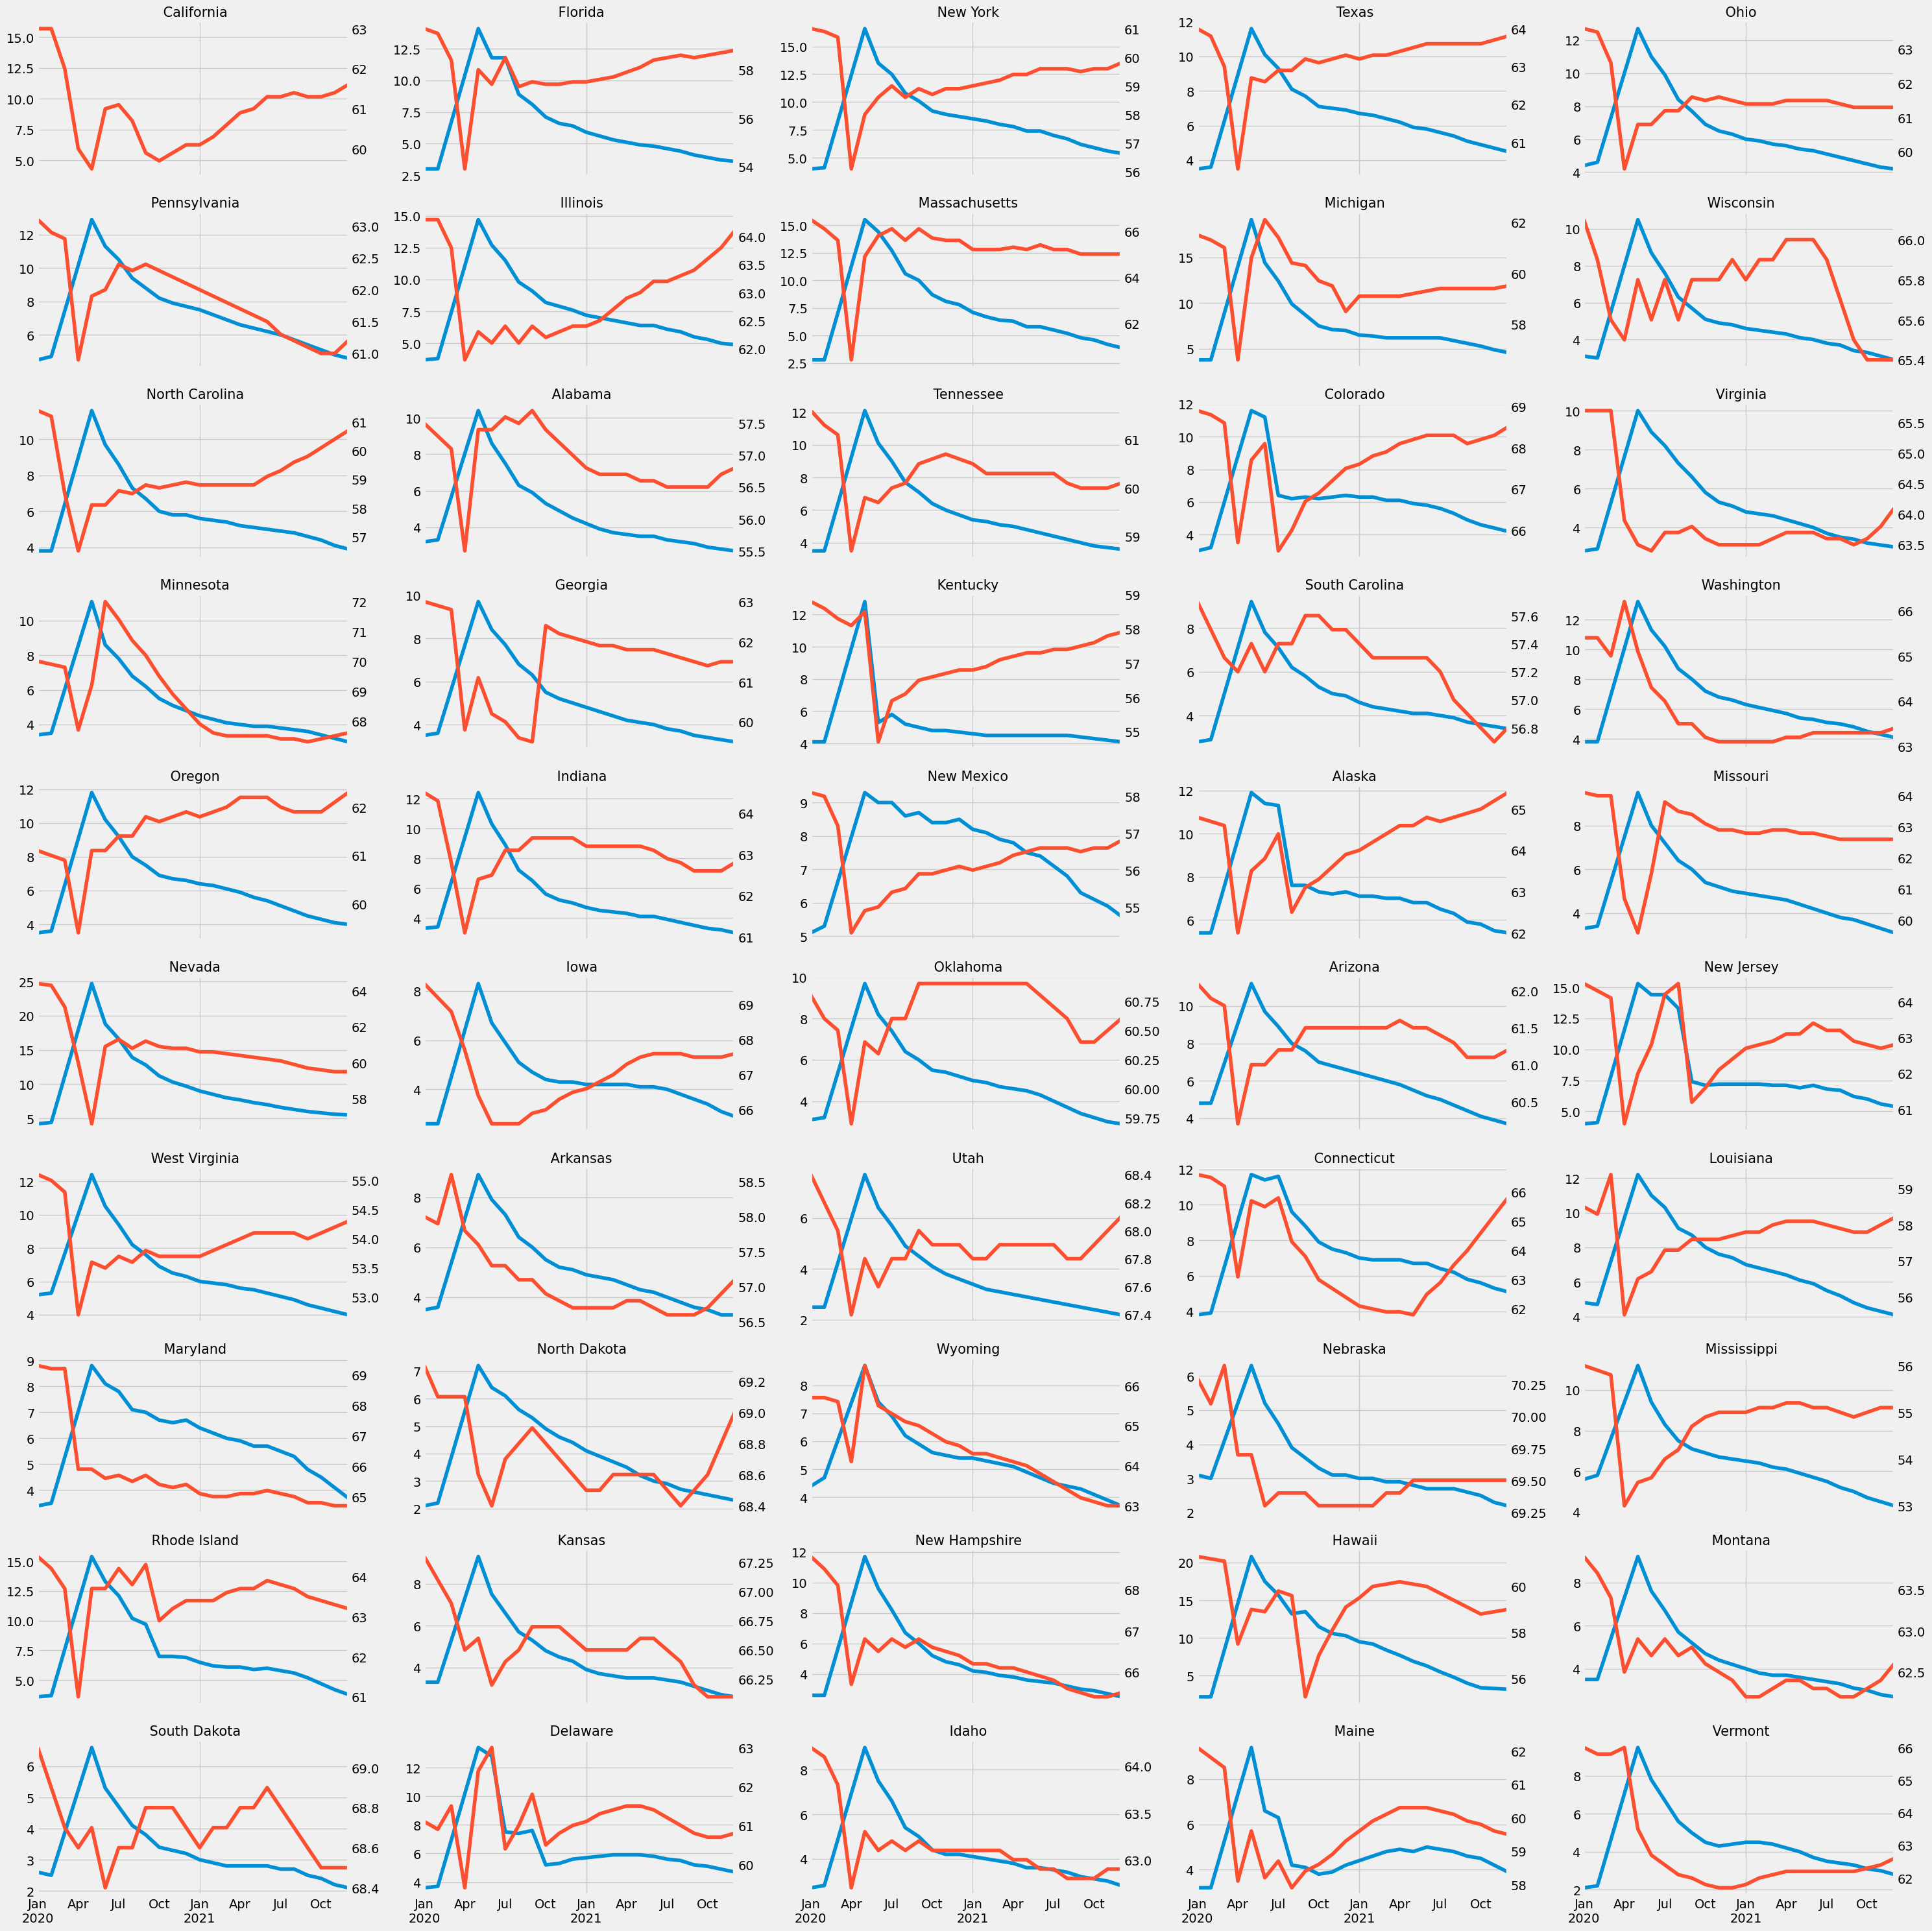

In [308]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state.strip() == 'the District of Columbia' or state.strip() == 'Puerto Rico':
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state, fontsize=15)
    i += 1
plt.tight_layout()
plt.show()
